# Resume Parser

_Author:_ @AdameBf \\\
_Last edited:_ 2023-01-30

Inspired by [this article on projectpro.io](https://www.projectpro.io/article/artificial-intelligence-project-ideas/461#mcetoc_1fcb5nj0np), the aim is to classify resumes depending on the keywords they feature.

As suggesed in the article, the dataset used is [that of Kaggle](https://www.kaggle.com/gauravduttakiit/resume-dataset).

## 0. Loading steps

### 0.1. Library imports

In [7]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 0.2. Loading of the dataset

In [4]:
resume_data = pd.read_csv(r'data/UpdatedResumeDataSet.csv')

In [5]:
resume_data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


## 1. Analysing the dataset

How much data do we have? (How many rows? For each row, how many columns?)

In [10]:
resume_data.shape

(962, 2)

That's 962 rows, but do we have nulls?

In [12]:
resume_data.isnull().sum()

Category    0
Resume      0
dtype: int64

No sanitisation is therefore required.

The dataset is composed of two columns, namely, the category and the information contained in the resume.

Whilst the second column is basically unstructured data, the first one could be a handy way to group the different resumes together (in other words: we could potentially form classes using this).

Let us check whether the classes are balanced.

In [13]:
# Class balance
print('Number of classes:', resume_data['Category'].nunique())
resume_data['Category'].value_counts()

Number of classes: 25


Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

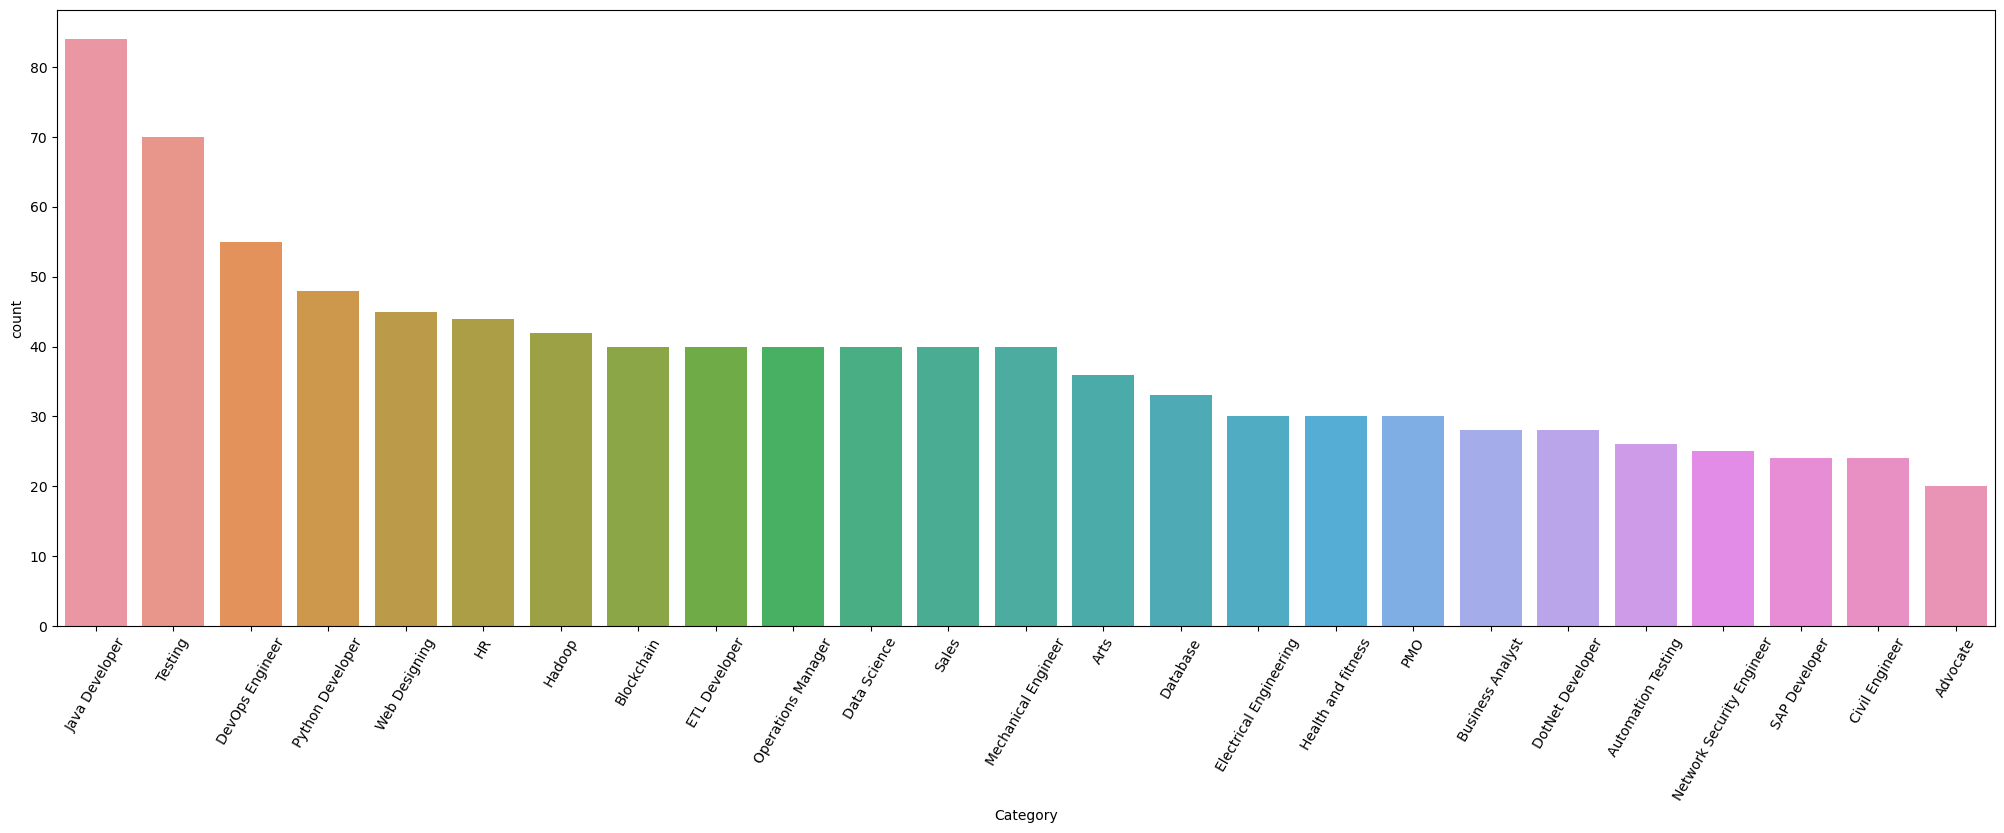

In [8]:
# Class spread visualisation: here's an example of how to do it with matplotlib and seaborn

plt.figure(figsize=(25,8))
plt.xticks(rotation=60)
# count plot on single categorical variable
sns.countplot(x ='Category', data=resume_data, order=resume_data['Category'].value_counts().index)
 
# Show the plot
plt.show()

The classes do seem somewhat unbalanced (ratio of 4 between the most frequent class and the rarest one). Chances are balancing techniques will be needed.

## 2. Pre-processing

To perform one-hot encoding of the 25 job categories of the dataset, it is possible to use ``get_dummies`` from ``pandas``.

In [17]:
pd.get_dummies(resume_data['Category'], prefix='cat')

,cat_Advocate,cat_Arts,cat_Automation Testing,cat_Blockchain,cat_Business Analyst,cat_Civil Engineer,cat_Data Science,cat_Database,cat_DevOps Engineer,cat_DotNet Developer,...,cat_Java Developer,cat_Mechanical Engineer,cat_Network Security Engineer,cat_Operations Manager,cat_PMO,cat_Python Developer,cat_SAP Developer,cat_Sales,cat_Testing,cat_Web Designing
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


To treat the ``Resume`` column now, we will need NLP techniques.